In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline



In [3]:
from sklearn import linear_model

In [5]:
microbiology_data_string = "microbiology_all_11.csv"
microbiology_data = pd.read_csv(microbiology_data_string, encoding="latin1")

In [6]:
X = microbiology_data.drop('interpretation',1)
Y = microbiology_data.interpretation

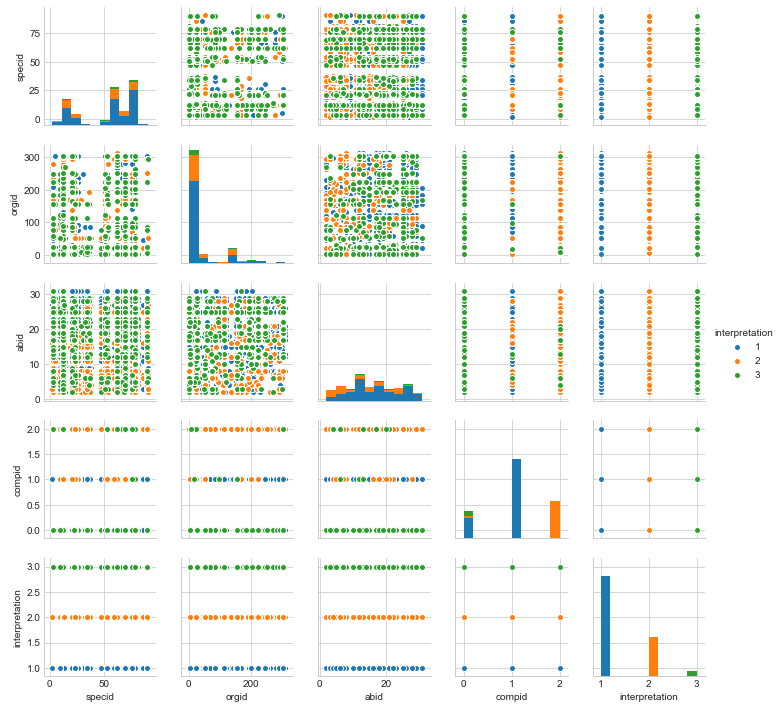

In [7]:
sns.pairplot(microbiology_data,hue='interpretation',size=2)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

F:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
logreg = LogisticRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.4, random_state=3)

In [10]:
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
from sklearn import metrics

In [12]:
Y_pred = logreg.predict(X_test)

In [13]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.9491219832848155


In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors = 30)

In [16]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [17]:
Y_pred = knn.predict(X_test)

In [18]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.9359470372804958


In [19]:
#find optimal K value

In [23]:
k_range = range(1,40)

accuracy = []

In [24]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

Text(0,0.5,'Accuracy')

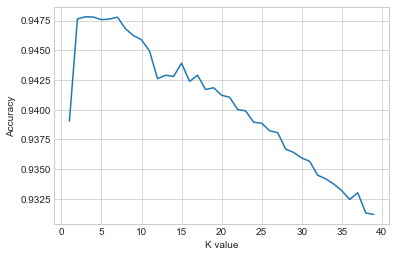

In [25]:
plt.plot(k_range,accuracy)
plt.xlabel('K value')
plt.ylabel('Accuracy')